## PricewarsMerchant
A fast way to build your own merchant is to subclass the PricewarsMerchant and build your own functionality on top of it.
PricewarsMerchant is an abstract base class that implements most tasks of a merchant.
It also provides a server component that processes incomming requests from the marketplace.
Let's build our own merchant!

The following step is specific for this notebook.
It is not necessary if your merchant is in the repository root.

In [1]:
import sys
sys.path.append('../')

Our merchants inherits from the PricewarsMerchant.
It requires the arguments: port, token, marketplace_url, producer_url and name.
Token can be `None`. If that is the case, the merchant will automatically register after it is started and get a new token.

In [2]:
from pricewars_merchant import PricewarsMerchant

class ExampleMerchant(PricewarsMerchant):
    pass

port=5010
token=None
marketplace_url='http://marketplace:8080'
producer_url='http://producer:3050'
name='Example Merchant'

try:
    merchant = ExampleMerchant(port, token, marketplace_url, producer_url, name)
except TypeError as e:
    print(e)

Can't instantiate abstract class ExampleMerchant with abstract methods calculate_price


There is only one more thing to do, to have a fully working merchant.
Override the pricing method called `calculate_price` to set your own prices.
This method is called with the current market situation and a offer id.
The method should return the new price for this offer id.

Let's keep it simple for now and always return the same price.

In [3]:
class ExampleMerchant(PricewarsMerchant):
    def calculate_price(self, offer_id, market_situation):
        return 25
    
merchant = ExampleMerchant(port, token, marketplace_url, producer_url, name)

You can start the merchant with
```
merchant.run()
```

## Changing merchant settings
It is possible to change the merchant's settings in the management UI.
This can be done for all settings that are in the `settings` object.

In [4]:
merchant.settings

{'order threshold': 0,
 'primeShipping': 1,
 'restock limit': 20,
 'shipping': 5,
 'update interval': 5}

You can override these settings. For example change `order threshold` and `restock limit` to change the order behavior.

In [5]:
merchant.settings['order threshold'] = 3
merchant.settings['restock limit'] = 30
merchant.settings

{'order threshold': 3,
 'primeShipping': 1,
 'restock limit': 30,
 'shipping': 5,
 'update interval': 5}

In the same way, you can add new settings and make them editable in the management UI.

Example for a fixed but configurable selling price:

In [6]:
class ExampleMerchant(PricewarsMerchant):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.settings['selling price'] = 25
    
    def calculate_price(self, offer_id, market_situation):
        return self.settings['selling price']

If you run this merchant, it is possible to change its selling price in the management UI:
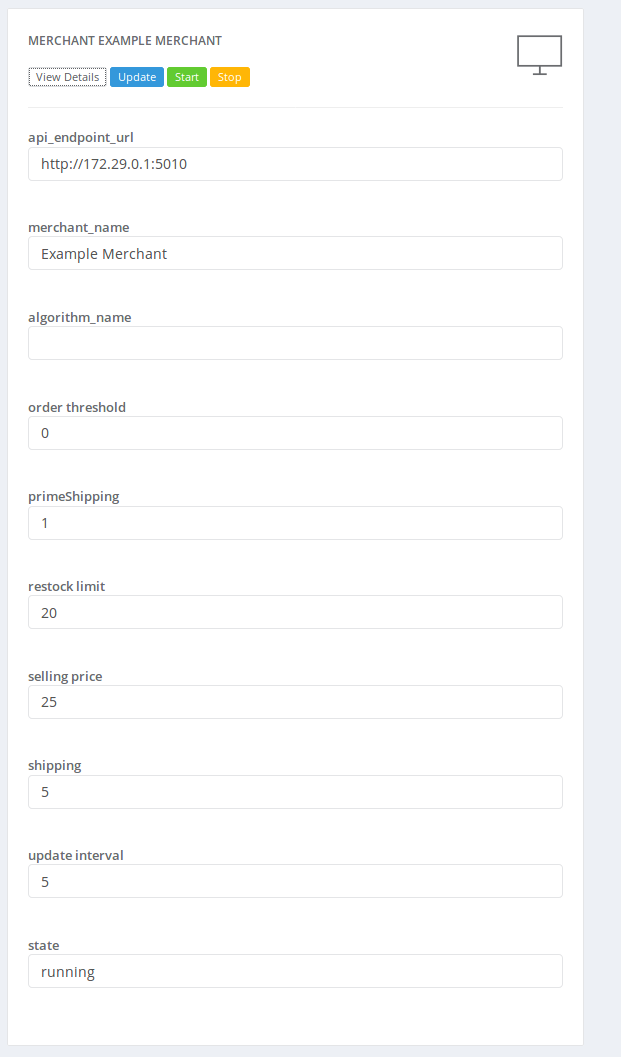

## React on sale event
The merchant gets a message from the marketplace, whenever it sells a product.
The PricewarsMerchant only prints a message when this happens.
But you can override the `sold_offer` method to do something else.
E.g. change the price or order new products.

In [7]:
class ExampleMerchant(PricewarsMerchant):
    def calculate_price(self, offer_id, market_situation):
        return 25
    
    def sold_offer(self, offer):
        print(offer)
        # do fancy stuff